In [1]:
# Importing libraries
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
%matplotlib inline

# Dataset analisys and visualisation

In [195]:
# Getting all paths with images
path1 = glob.glob('DataBase/HAM10000_images_part_1/*')
path2 = glob.glob('DataBase/HAM10000_images_part_2/*')
# Sorting filenames
path1.sort()
path2.sort()

In [196]:
# Reading all database and save it in dataframe
dataframe = pd.read_csv('DataBase/HAM10000_metadata.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [197]:
# Dataframe sorting by images ID and visualisation
dataframe = dataframe.sort_values('image_id',axis=0, ignore_index=True)
dataframe

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
1,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
2,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
4,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest
...,...,...,...,...,...,...,...
10010,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity
10011,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity
10012,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk
10013,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk


In [198]:
# Data analisys: Counting samples for each disease
names , n_counts = np.unique(dataframe['dx'], return_counts =True)
# Checking unique diseases and their indexes
names

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)

In [199]:
# Connecting whole names of diseases with their shortcuts
full_names = {'akiec':"0 - Bowen's desease", 'bcc':'1 - basal cell carcinoma',
        'bkl':'2 - benign keratosis-like lesions', 'df':'3 - dermatofibroma',
        'mel':'4 - melanoma', 'nv':'5 - melanocytic nevi', 'vasc':'6 - vascular lesions'}
full_names

{'akiec': "0 - Bowen's desease",
 'bcc': '1 - basal cell carcinoma',
 'bkl': '2 - benign keratosis-like lesions',
 'df': '3 - dermatofibroma',
 'mel': '4 - melanoma',
 'nv': '5 - melanocytic nevi',
 'vasc': '6 - vascular lesions'}

In [200]:
# Putting indexes (0-6) of diseases for each sample
dataframe['disease_id'] = pd.Categorical(dataframe['dx']).codes
dataframe

,lesion_id,image_id,dx,dx_type,age,sex,localization,disease_id
0,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,5
1,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,5
2,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,5
3,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,5
4,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,4
...,...,...,...,...,...,...,...,...
10010,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity,4
10011,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity,4
10012,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk,2
10013,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk,5


In [201]:
# Setting images size
IMG_WIDTH = 200
IMG_HEIGHT = 200

In [204]:
# Function to read a dataset from 1 part of images
data = []

def get_data1():
    for path in path1:
        img = cv.imread(path, cv.IMREAD_GRAYSCALE)
        new_img = cv.resize(img, (IMG_WIDTH,IMG_HEIGHT))
        data.append(new_img)

In [205]:
get_data1()

In [206]:
# Function to read a dataset from 2 part of images
def get_data2():
    for path in path2:
        img = cv.imread(path, cv.IMREAD_GRAYSCALE)
        new_img = cv.resize(img, (IMG_WIDTH,IMG_HEIGHT))  
        data.append(new_img)

get_data2()

In [207]:
#Checking the length
len(data)

10015

In [208]:
# Normalisation 0-1 - value in pixels
for i in range(0,len(data)):
    data[i]=data[i]/255

In [209]:
# Adding normalised images to the DataFrame
dataframe['image']= data

In [164]:
dataframe

,lesion_id,image_id,dx,dx_type,age,sex,localization,disease_id,image
0,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,5,"[[0.615686274509804, 0.6235294117647059, 0.639..."
1,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,5,"[[0.596078431372549, 0.592156862745098, 0.6, 0..."
2,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,5,"[[0.7725490196078432, 0.7725490196078432, 0.76..."
3,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,5,"[[0.5882352941176471, 0.5803921568627451, 0.58..."
4,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,4,"[[0.17647058823529413, 0.17254901960784313, 0...."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity,4,"[[0.16470588235294117, 0.1803921568627451, 0.2..."
10011,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity,4,"[[0.803921568627451, 0.796078431372549, 0.7921..."
10012,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk,2,"[[0.6, 0.596078431372549, 0.596078431372549, 0..."
10013,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk,5,"[[0.23137254901960785, 0.24705882352941178, 0...."


In [210]:
# Checking Nan values
dataframe.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
disease_id       0
image            0
dtype: int64

In [215]:
# Replacing the Nan to mean age
mean_age = int(dataframe['age'].mean())
dataframe['age'].fillna(value=mean_age,inplace = True)

In [216]:
# Checking Nan values
dataframe.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
disease_id      0
image           0
dtype: int64

Text(0.5, 1.0, 'Samples of skin diseases')

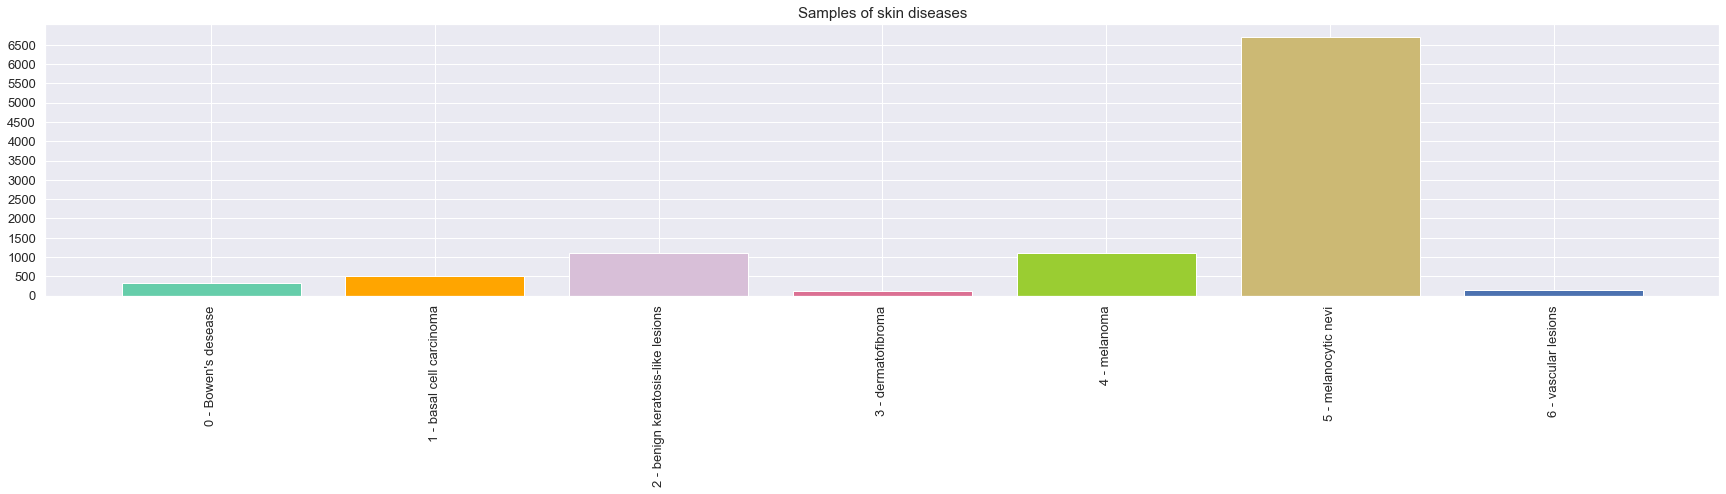

In [263]:
# Samples of skin diseases in dataset analise
disease = []
for key in full_names.keys():
    disease.append(full_names[key])

plt.bar(disease, n_counts, color=['mediumaquamarine', 'orange', 
                                'thistle', 'palevioletred', 
                                'yellowgreen','y','b'])
plt.xticks(rotation='vertical', fontsize=13)
plt.yticks(range(0,7000,500), fontsize=13)
plt.title('Samples of skin diseases', fontsize=15)

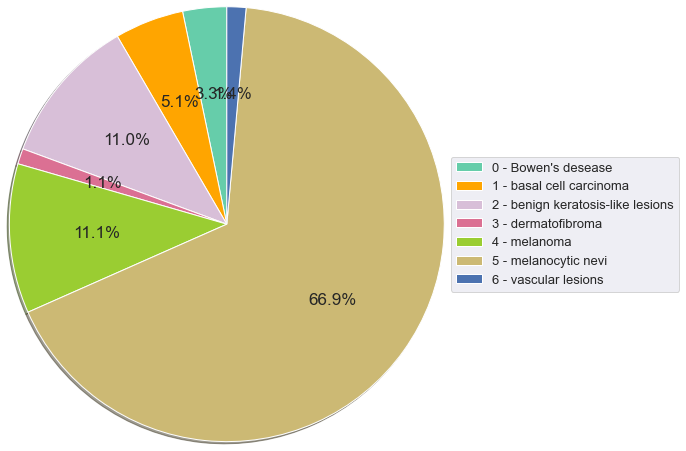

In [272]:
plt.pie(x=n_counts, 
        radius=2, 
        autopct='%1.1f%%',
        shadow=True, startangle=90, 
        textprops=dict(fontsize=17),
        colors=['mediumaquamarine', 'orange', 
                'thistle', 'palevioletred', 
                'yellowgreen','y','b'])
plt.legend(disease, 
           loc="center left", 
           bbox_to_anchor=(1.3, 0, 0.4, 1), 
           fontsize=13)

* imbalanced dataset:  almost 67% of one class

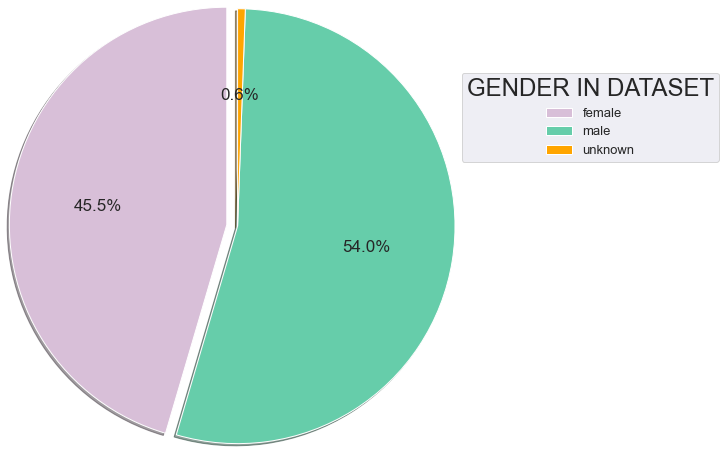

In [219]:
# Analising the gender in the dataset
gender, g_counts = np.unique(dataframe['sex'], return_counts =True)
explode = (0.1, 0, 0)
plt.pie(x=g_counts, 
        explode=explode, 
        radius=2, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90, 
        textprops=dict(fontsize=17), 
        colors = ['thistle','mediumaquamarine',
                  'orange'])
plt.legend(gender,
          title="GENDER IN DATASET",
          loc="center left",
          bbox_to_anchor=(1.3, 0.4, 0.4, 1),
          fontsize=13)

Text(0, 0.5, 'Count')

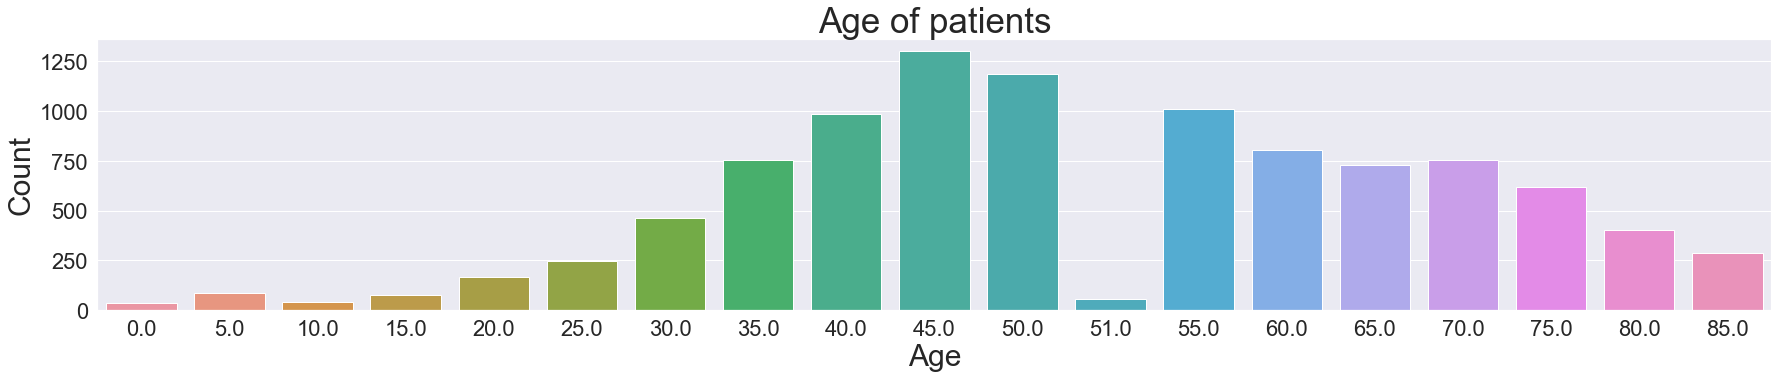

In [220]:
# Visualisate age of patients 
sb.set(rc = {'figure.figsize':(30,5)})
sb.set(font_scale = 2)
age = sb.countplot(data=dataframe,x='age')
age.set_title('Age of patients', fontsize=35)
age.set_xlabel('Age', fontsize=30)
age.set_ylabel('Count', fontsize=30)

Text(0, 0.5, 'Count')

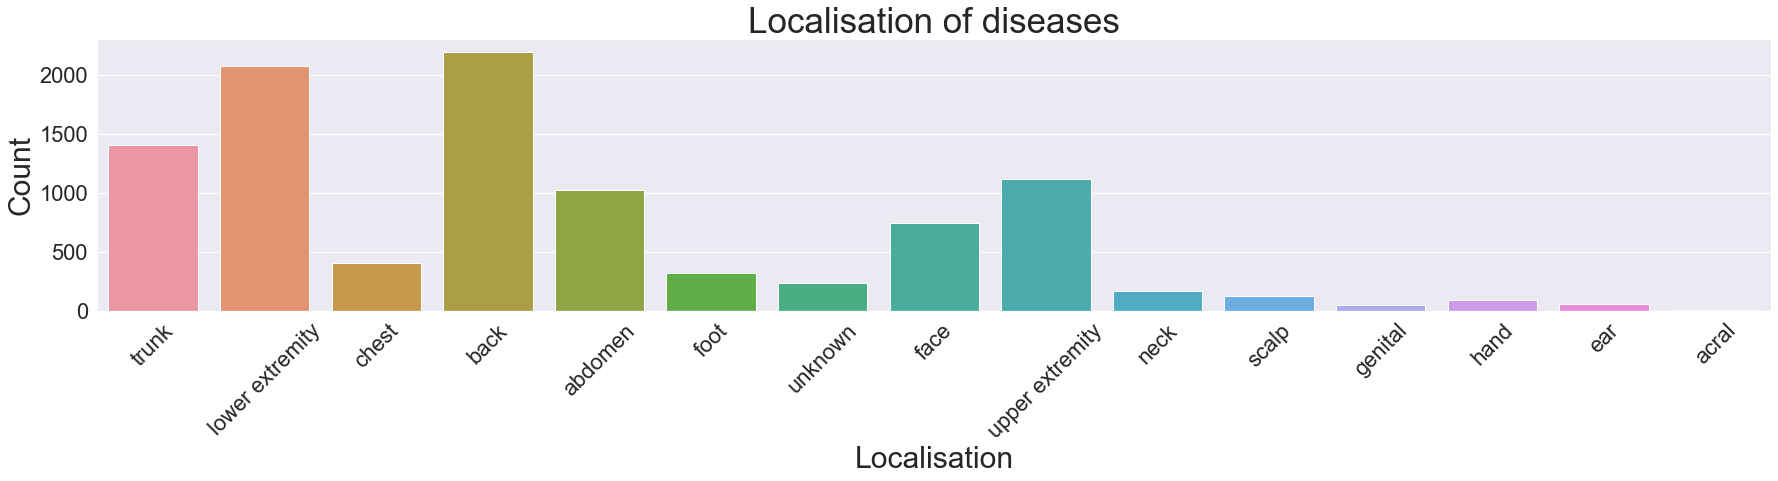

In [221]:
# Analisying the localisation of diseases
sb.set(rc = {'figure.figsize':(30,5)})
sb.set(font_scale = 2)
age = sb.countplot(data=dataframe,x='localization')
age.set_title('Localisation of diseases', fontsize=35)
plt.xticks(rotation=45)
age.set_xlabel('Localisation', fontsize=30)
age.set_ylabel('Count', fontsize=30)

Text(0, 0.5, 'Age')

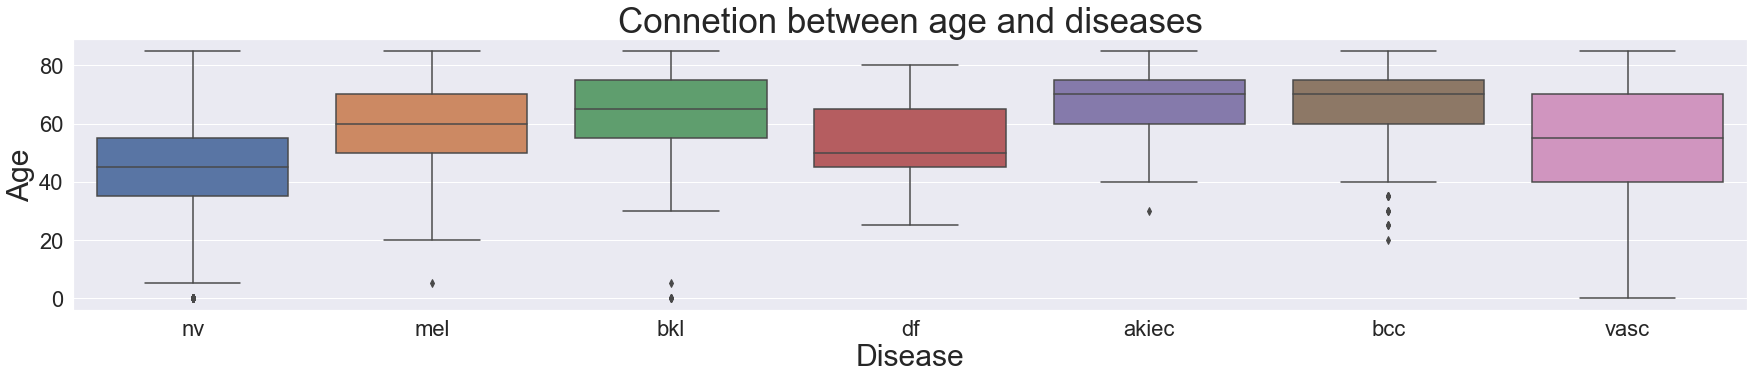

In [222]:
# Analise age and diseases 
age_dx = sb.boxplot(x='dx', y='age', data=dataframe)
age_dx.set_title('Connetion between age and diseases', fontsize=35)
age_dx.set_xlabel('Disease',fontsize=30)
age_dx.set_ylabel('Age',fontsize=30)

In [223]:
import random
# Function to visualise a sample image of the disease
img_path = 'DataBase/HAM10000_images_part_1/'
def image_show(disease):
    df = dataframe[dataframe['dx'] == disease]
    df = df.sort_values('image_id',axis=0, ignore_index=True)
    num = random.randint(0,10)
    img = cv.imread(img_path + df['image_id'][num]+'.jpg')
    rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return rgb_img

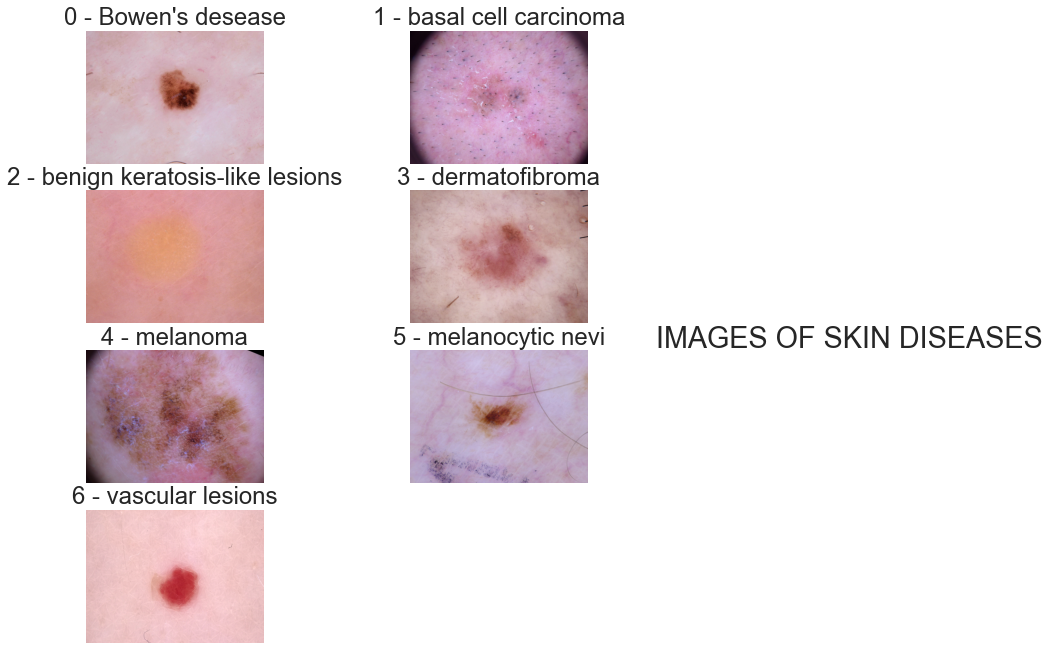

In [224]:
plt.suptitle('IMAGES OF SKIN DISEASES')
ax1 = plt.subplot(421)
ax1.imshow(image_show('akiec'))
ax1.axis('off')
ax1.set_title(full_names['akiec'])
ax2 = plt.subplot(422)
ax2.imshow(image_show('bcc'))
ax2.axis('off')
ax2.set_title(full_names['bcc'])
ax3 = plt.subplot(423)
ax3.imshow(image_show('bkl'))
ax3.axis('off')
ax3.set_title(full_names['bkl'])
ax4 = plt.subplot(424)
ax4.imshow(image_show('df'))
ax4.axis('off')
ax4.set_title(full_names['df'])
ax5 = plt.subplot(425)
ax5.imshow(image_show('mel'))
ax5.axis('off')
ax5.set_title(full_names['mel'])
ax6 = plt.subplot(426)
ax6.imshow(image_show('nv'))
ax6.axis('off')
ax6.set_title(full_names['nv'])
ax7 = plt.subplot(427)
ax7.imshow(image_show('vasc'))
ax7.axis('off')
ax7.set_title(full_names['vasc'])
plt.subplots_adjust(left  = 0.125, right = 0.4, bottom = 0.1,
                    top = 1.8, wspace = 0.2, hspace = 0.2 ) 

In [231]:
# Saving data and labels
X = np.array(data)

In [233]:
y = np.array(dataframe['disease_id'])

In [236]:
print('X shape: ')
print(X.shape)
print('y shape: ')
print(y.shape)

X shape: 
(10015, 200, 200)
y shape: 
(10015,)


In [237]:
# Reshaping images
X_res = X.reshape(X.shape[0],-1)

In [240]:
# Solving the problem with the imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
oversampled_X, oversampled_y  = oversample.fit_resample(X_res , y)

In [241]:
print('oversampled_X shape: ')
print(oversampled_X.shape)
print('oversampled_y shape: ')
print(oversampled_y.shape)

oversampled_X shape: 
(46935, 40000)
oversampled_y shape: 
(46935,)


Text(0.5, 1.0, 'Samples of skin diseases')

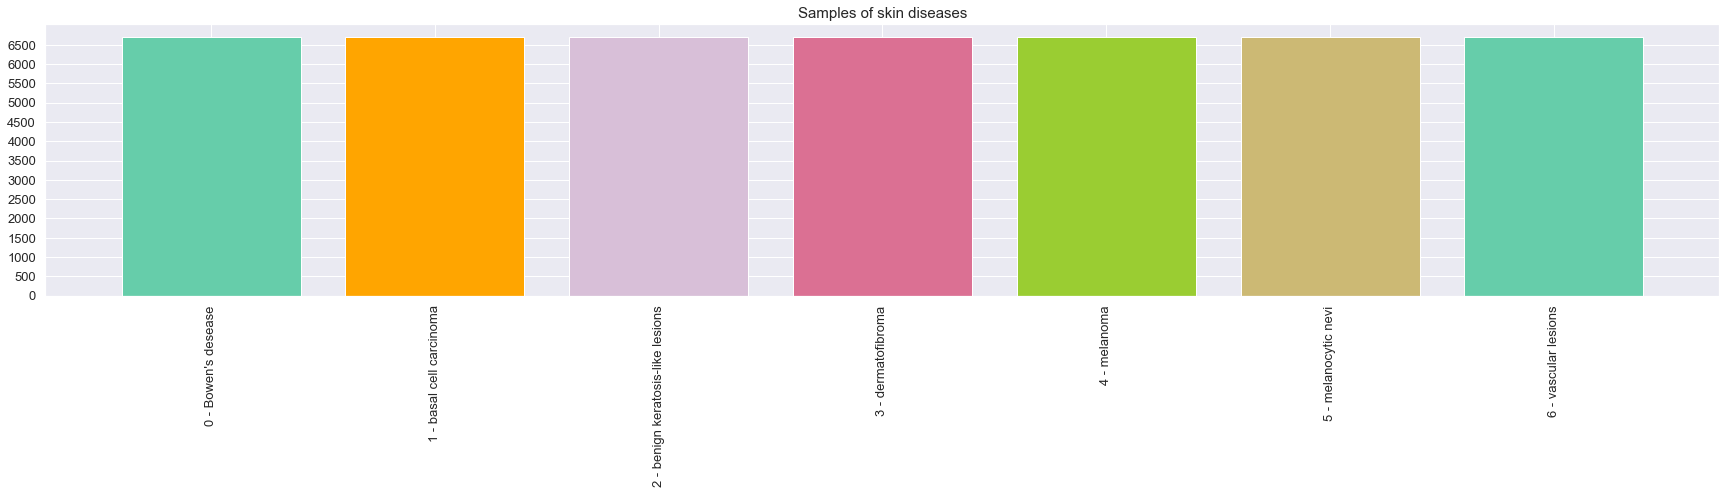

In [250]:
, n_counts1 = np.unique(oversampled_y, return_counts =True)
plt.bar(disease, n_counts1, color=['mediumaquamarine', 'orange', 
                                'thistle', 'palevioletred', 
                                'yellowgreen','y'])
plt.xticks(rotation='vertical', fontsize=13)
plt.yticks(range(0,7000,500), fontsize=13)
plt.title('Samples of skin diseases', fontsize=15)

* the dataset is balanced after this process

In [251]:
# Split the dataset into train and test 
# the ds is not large enough to make validation

In [ ]:
from tensorflow.kerasas import 